In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df=pd.read_csv('./files/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
#test_size=20% of the data , train=80% , random_state means to choose randomly

In [8]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [9]:
y_train.shape,y_test.shape

((712,), (179,))

In [10]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()

In [11]:
x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['Age_mean']=x_train['Age'].fillna(mean_age)

x_train['fare_median']=x_train['Fare'].fillna(median_fare)
x_train['fare_mean']=x_train['Fare'].fillna(median_fare)

In [12]:
x_train.sample(3)


,Age,Fare,Family,Age_median,Age_mean,fare_median,fare_mean
573,NaN,7.7500,0,28.75,29.785904,7.7500,7.7500
177,50.0,28.7125,0,50.00,50.000000,28.7125,28.7125
541,9.0,31.2750,6,9.00,9.000000,31.2750,31.2750


In [13]:
x_test.sample(3)

,Age,Fare,Family
711,NaN,26.5500,0
707,42.0,26.2875,0
65,NaN,15.2458,2


In [14]:
print('Age variable variance: ',x_train['Age'].var())
print('Variance after median imputation: ',x_train['Age_median'].var())
print('Varian after mean imputation: ',x_train['Age_mean'].var())

Age variable variance:  204.34951339046142
Variance after median imputation:  161.98956633460548
Varian after mean imputation:  161.81262452718676


In [15]:
print('Fare variable variance: ',x_train['Fare'].var())
print('Variance after median imputation: ',x_train['fare_median'].var())
print('Varian after mean imputation: ',x_train['fare_mean'].var())

Fare variable variance:  2448.1979137063163
Variance after median imputation:  2340.09102197536
Varian after mean imputation:  2340.09102197536


In [16]:
x_train['Fare'].isnull().value_counts()
#x_train.head(40)

Fare
False    676
True      36
Name: count, dtype: int64

In [17]:
null_rows = x_train[x_train.isnull().any(axis=1)]
null_rows

,Age,Fare,Family,Age_median,Age_mean,fare_median,fare_mean
77,NaN,8.0500,0,28.75,29.785904,8.0500,8.0500
868,NaN,9.5000,0,28.75,29.785904,9.5000,9.5000
334,NaN,133.6500,1,28.75,29.785904,133.6500,133.6500
295,NaN,27.7208,0,28.75,29.785904,27.7208,27.7208
860,41.0,NaN,2,41.00,41.000000,14.4583,14.4583
...,...,...,...,...,...,...,...
674,NaN,0.0000,0,28.75,29.785904,0.0000,0.0000
466,NaN,NaN,0,28.75,29.785904,14.4583,14.4583
584,NaN,8.7125,0,28.75,29.785904,8.7125,8.7125
527,NaN,221.7792,0,28.75,29.785904,221.7792,221.7792


In [18]:
m=x_train['Fare'].fillna(-30)
m.tail(18)

287      7.8958
831    -30.0000
47       7.7500
725      8.6625
587     79.2000
607     30.5000
433      7.1250
674      0.0000
263      0.0000
360     27.9000
75       7.6500
466    -30.0000
299    247.5208
534      8.6625
584      8.7125
493     49.5042
527    221.7792
168     25.9250
Name: Fare, dtype: float64

In [19]:
x_test['Fare'].isnull().value_counts()

Fare
False    170
True       9
Name: count, dtype: int64

In [20]:
m1=x_test.fillna(-1)
m1

,Age,Fare,Family
707,42.0,26.2875,0
37,21.0,8.0500,0
615,24.0,65.0000,3
169,28.0,56.4958,0
68,17.0,7.9250,6
...,...,...,...
89,24.0,8.0500,0
80,22.0,9.0000,0
846,-1.0,69.5500,10
870,26.0,7.8958,0


In [21]:
ans1=x_train['Age'].fillna(x_train['Age_mean'])

ans1

30     40.000000
10      4.000000
873    47.000000
182     9.000000
876    20.000000
         ...    
534    30.000000
584    29.785904
493    71.000000
527    29.785904
168    29.785904
Name: Age, Length: 712, dtype: float64

In [22]:
ans2=x_train['Fare'].fillna(x_train['fare_mean'])

ans2

30      27.7208
10      16.7000
873      9.0000
182     31.3875
876      9.8458
         ...   
534      8.6625
584      8.7125
493     49.5042
527    221.7792
168     25.9250
Name: Fare, Length: 712, dtype: float64

<Axes: ylabel='Frequency'>

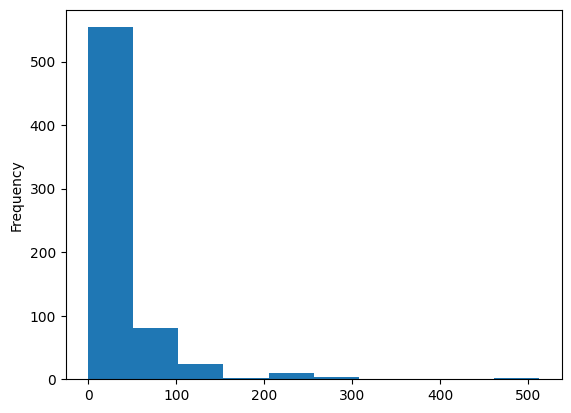

In [23]:
x_train['Fare'].plot(kind='hist')

<Axes: >

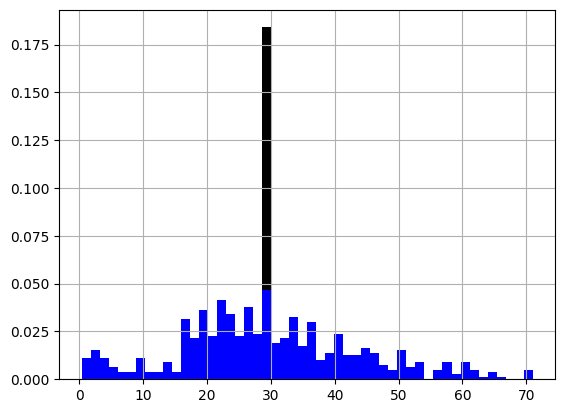

In [24]:

x_train['Age_median'].hist(bins=50, density=True,color='black')
x_train['Age'].hist(bins=50, density=True,color='blue')

<Axes: >

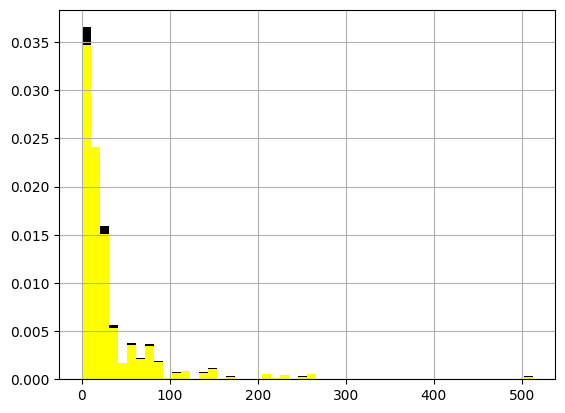

In [25]:

x_train['Fare'].hist(bins=50, density=True,color='black')
x_train['fare_median'].hist(bins=50, density=True,color='yellow')

In [26]:
#using sklearn 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [27]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [30]:
x=df.iloc[:,0:4]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [35]:
imputer1=SimpleImputer(strategy="median")


In [36]:
imputer1.fit_transform(x_train)

array([[51.    , 26.55  ,  0.    ,  1.    ],
       [49.    , 76.7292,  1.    ,  1.    ],
       [ 1.    , 46.9   ,  7.    ,  0.    ],
       ...,
       [29.    ,  7.7333,  0.    ,  0.    ],
       [36.    , 17.4   ,  1.    ,  1.    ],
       [60.    , 39.    ,  2.    ,  0.    ]])

In [37]:
imputer1.statistics_

array([29. , 14.5,  0. ,  0. ])

In [48]:
# ColumnTransformer:

# The ColumnTransformer is a way to apply different transformers to different columns of a DataFrame or array. It is often used in preprocessing pipelines in machine learning.
# ('imputer', imputer, ['Age']):

# This is specifying a transformer to be applied to the 'Age' column. The transformer is named 'imputer', and imputer is assumed to be an instance of a scikit-learn transformer (e.g., SimpleImputer for handling missing values).
# remainder='passthrough':

# This parameter specifies what to do with the columns that are not explicitly mentioned in the transformers. In this case, 'passthrough' means that any columns not specified in the transformers will be passed through without any transformation.
# So, this ColumnTransformer is set up to apply an imputer to the 'Age' 

trf=ColumnTransformer([('imputer1',imputer1,["Age"])],remainder='passthrough')

In [49]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [50]:
trf.named_transformers_["imputer1"].statistics_

array([29.])

In [51]:
x_train=trf.transform(x_train)